# H1N1 and Seasonal Flu Vaccines

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Targets

- H1N1 vaccine - 21% received - imbalanced classes
- seasonal vaccine - 47% received - balanced classes

In [2]:
# import target data
labels_df = pd.read_csv("../data/Training_Labels.csv", index_col="respondent_id")
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [3]:
# percentage breakdown of binary classes for H1N1 vaccination rate
labels_df["h1n1_vaccine"].value_counts(normalize=True)*100

0    78.754634
1    21.245366
Name: h1n1_vaccine, dtype: float64

In [4]:
# percentage breakdown of binary classes forseasonal flu vaccination rate
labels_df["seasonal_vaccine"].value_counts(normalize=True)*100

0    53.439173
1    46.560827
Name: seasonal_vaccine, dtype: float64

### Features

- 35 unique features
- large amount of nulls in employment occupation, employment industry, health insurance
- group features into 
    - vaccine opinions - vax rates seem to vary across feature classes
    - behavioral patterns - vax rates seem standard across feature classes 
    - medical concerns - vax rates seem to vary across feature classes
    - demographics - vax rates seem standard across feature classes EXCEPT employment occupation & industry

In [5]:
# import feature data
features_df = pd.read_csv("../data/Training_Features.csv", index_col="respondent_id")
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
# join feature and target data for eda 
df = features_df.join(labels_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [7]:
# explore null values 
df.isna().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_seasonal            2160
doctor_recc_h1n1                2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [8]:
features_df['employment_occupation'].value_counts()

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

In [9]:
features_df['employment_industry'].value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [10]:
features_df['health_insurance'].value_counts()


1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [11]:
# plot class distribution for each feature

def vax_perc_plot(features, target):
    num_columns = 4
    num_rows = math.ceil(len(features) / num_columns)
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 4*num_rows))
    
    for i, feature in enumerate(features):
        row_idx = i // num_columns
        col_idx = i % num_columns
        
        counts = df[[feature, target]].groupby([feature, target]).size().unstack()
        perc = counts.div(counts.sum(axis='columns'), axis='index')
        
        ax = perc.plot.bar(stacked=True, legend=False, ax=axes[row_idx, col_idx])
        ax.set_xlabel('')
        ax.set_title(feature)
    
    plt.legend(title=target, bbox_to_anchor=(1.05, 1))
    plt.tight_layout()


In [12]:
cols_vax = ['h1n1_concern',
            'h1n1_knowledge',
            'opinion_h1n1_vacc_effective',
            'opinion_h1n1_risk',
            'opinion_h1n1_sick_from_vacc',
            'opinion_seas_vacc_effective',
            'opinion_seas_risk',
            'opinion_seas_sick_from_vacc']

cols_behavioral = ['behavioral_antiviral_meds',
                   'behavioral_avoidance',
                   'behavioral_face_mask',
                   'behavioral_wash_hands',
                   'behavioral_large_gatherings',
                   'behavioral_outside_home',
                   'behavioral_touch_face']          

cols_med = ['doctor_recc_h1n1',
            'doctor_recc_seasonal',
            'chronic_med_condition',
            'child_under_6_months',
            'health_worker',
            'health_insurance',]

cols_demo = ['age_group',
             'education',
             'race',
             'sex',
             'marital_status',
             'employment_status',
             'employment_industry',
             'employment_occupation',
             'income_poverty',
             'rent_or_own',
             'hhs_geo_region',
             'census_msa',
             'household_adults',
             'household_children']

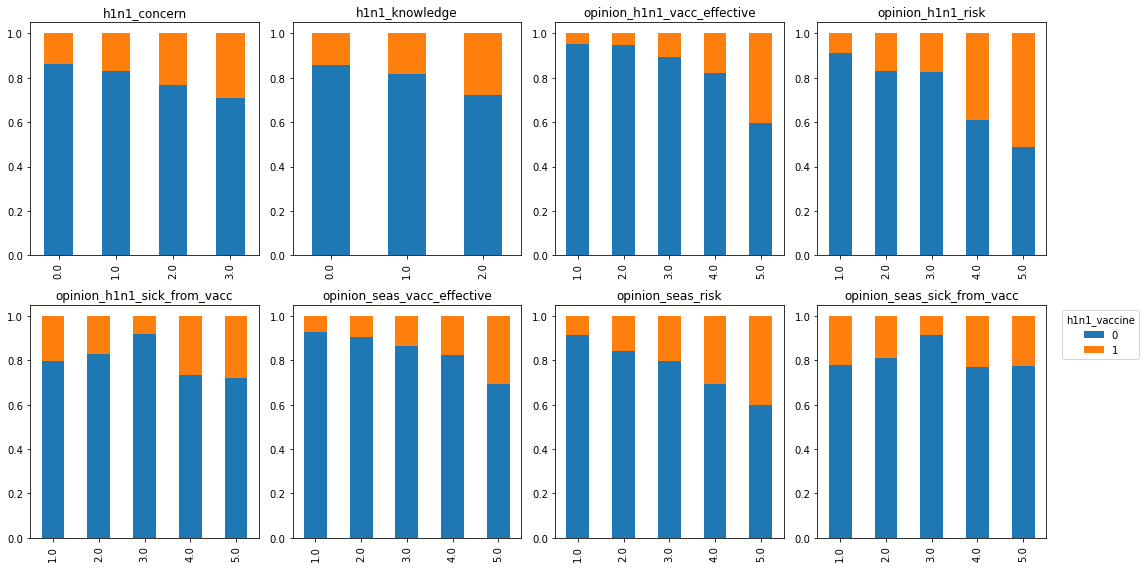

In [13]:
vax_perc_plot(cols_vax, 'h1n1_vaccine')

No handles with labels found to put in legend.


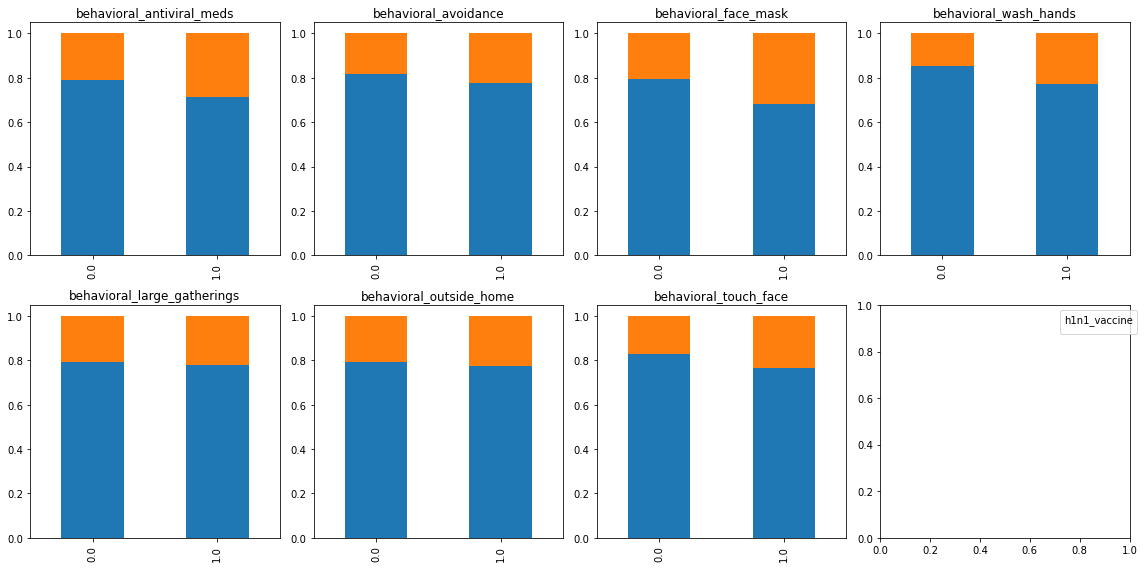

In [14]:
vax_perc_plot(cols_behavioral, 'h1n1_vaccine')

No handles with labels found to put in legend.


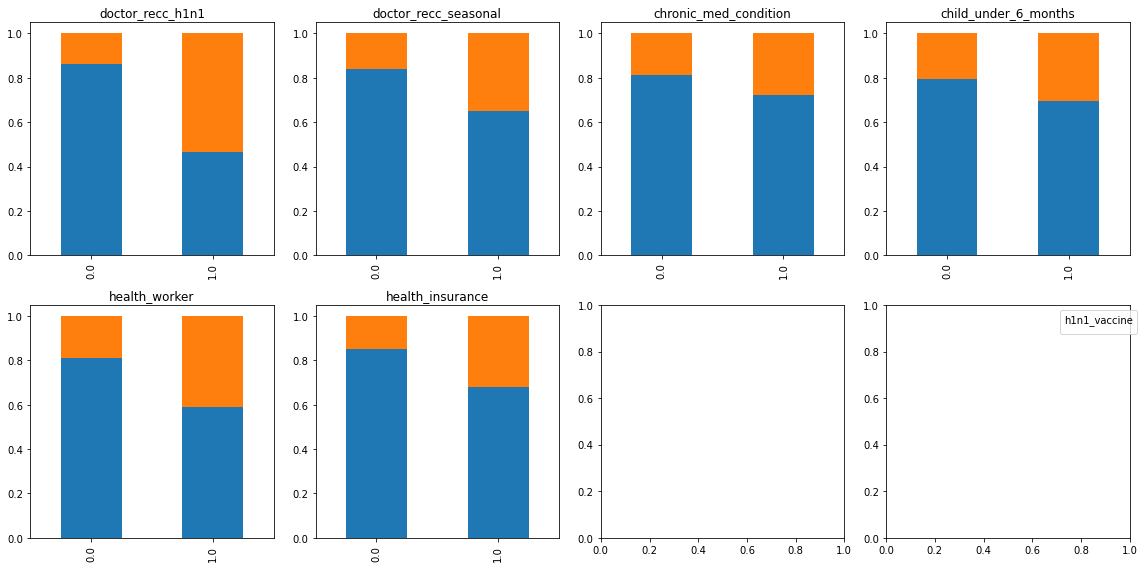

In [15]:
vax_perc_plot(cols_med, 'h1n1_vaccine')

No handles with labels found to put in legend.


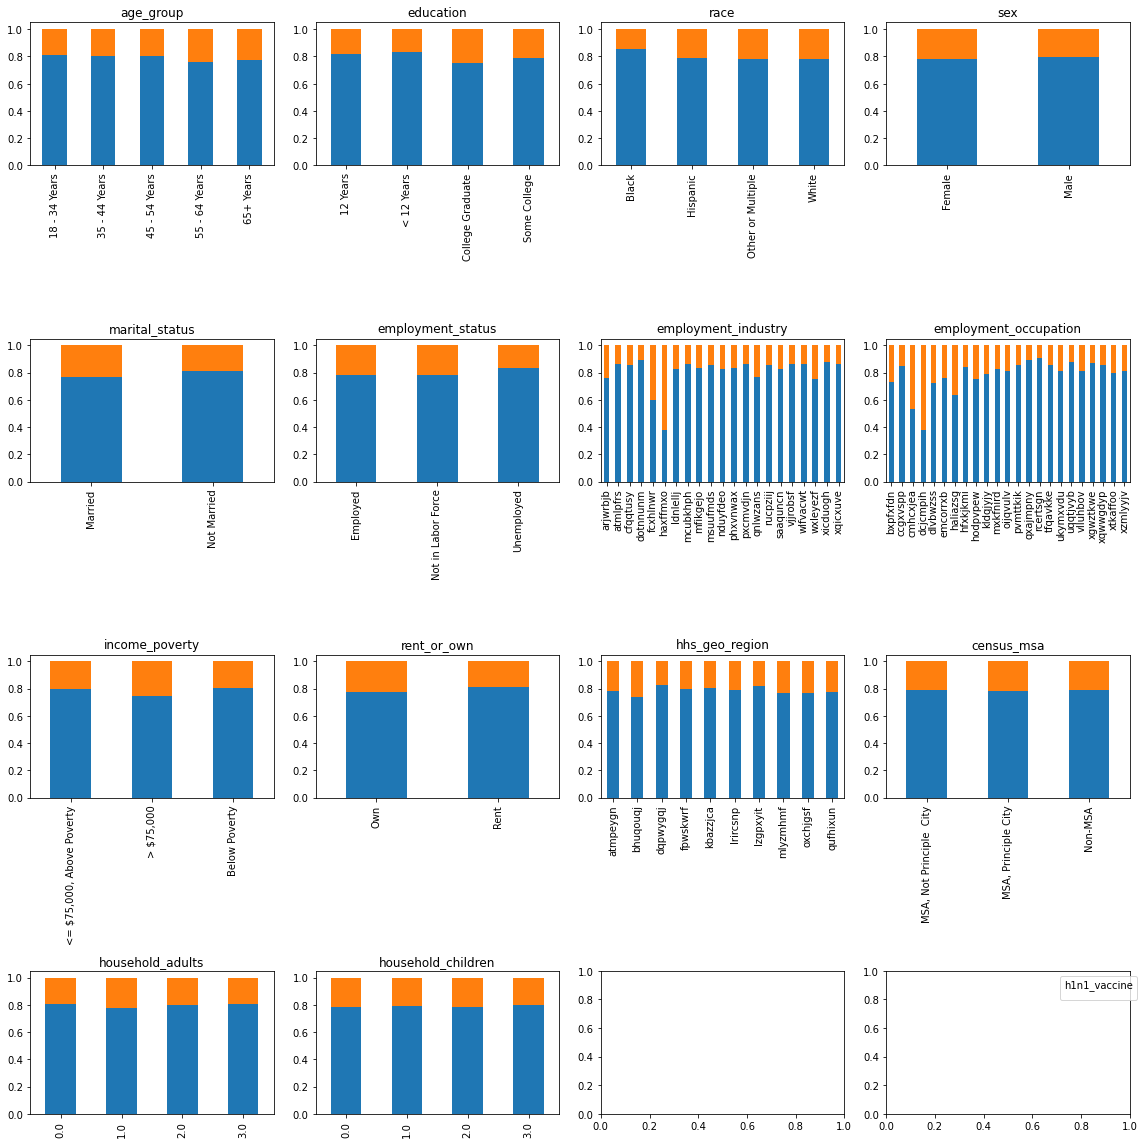

In [16]:
vax_perc_plot(cols_demo, 'h1n1_vaccine')

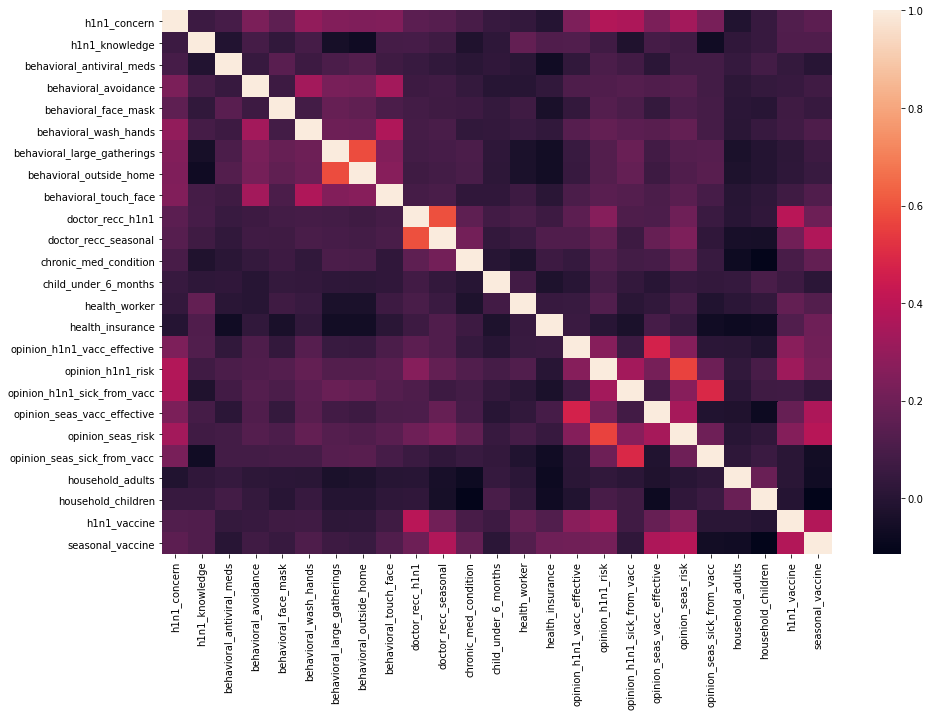

In [17]:
# plot correlation heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr());

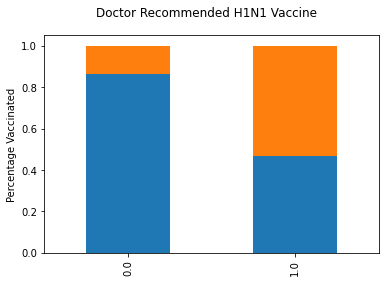

In [18]:
# set feature and target
feature = 'doctor_recc_h1n1'
target = 'h1n1_vaccine'

# plot
counts = df[[feature, target]].groupby([feature, target]).size().unstack()
perc = counts.div(counts.sum(axis='columns'), axis='index')
perc.plot.bar(stacked=True, legend=False)
plt.ylabel('Percentage Vaccinated')
plt.xlabel('')

# set title
plt.suptitle('Doctor Recommended H1N1 Vaccine');

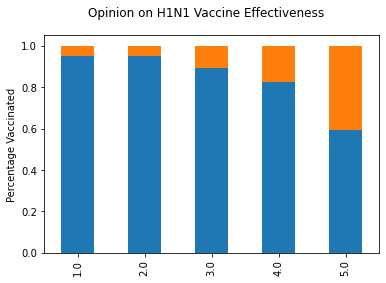

In [19]:
# set feature and target
feature = 'opinion_h1n1_vacc_effective'
target = 'h1n1_vaccine'

# plot
counts = df[[feature, target]].groupby([feature, target]).size().unstack()
perc = counts.div(counts.sum(axis='columns'), axis='index')
perc.plot.bar(stacked=True, legend=False)
plt.ylabel('Percentage Vaccinated')
plt.xlabel('')

# set title
plt.suptitle('Opinion on H1N1 Vaccine Effectiveness');

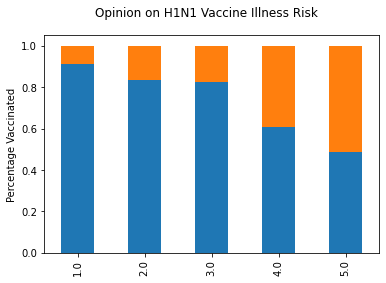

In [20]:
# set feature and target
feature = 'opinion_h1n1_risk'
target = 'h1n1_vaccine'

# plot
counts = df[[feature, target]].groupby([feature, target]).size().unstack()
perc = counts.div(counts.sum(axis='columns'), axis='index')
perc.plot.bar(stacked=True, legend=False)
plt.ylabel('Percentage Vaccinated')
plt.xlabel('')

# set title
plt.suptitle('Opinion on H1N1 Vaccine Illness Risk');

In [21]:
# drop targets and demographic columns which include all categorical variables
cols_to_drop = cols_demo + ['health_insurance', 'h1n1_vaccine', 'seasonal_vaccine']
cols_to_drop


['age_group',
 'education',
 'race',
 'sex',
 'marital_status',
 'employment_status',
 'employment_industry',
 'employment_occupation',
 'income_poverty',
 'rent_or_own',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'health_insurance',
 'h1n1_vaccine',
 'seasonal_vaccine']